In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns

np.random.seed(2021)

import warnings
warnings.filterwarnings(action='ignore')

## matplotlib 사용시 한국어 나오게 하는 코드
!apt -qq -y install fonts-nanum
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
fm._rebuild()

# 그래프에 retina display 적용
%config InlineBackend.figure_format = 'retina'

# Colab 의 한글 폰트 설정
plt.rc('font', family='NanumBarunGothic')

fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 37 not upgraded.


In [3]:
df = pd.read_csv('/content/drive/MyDrive/프로젝트/데이터분석 공모전/2021 공공빅데이터 공모전/cup_sharing/소상공인시장진흥공단_상가(상권)정보_서울_202106.csv',encoding='cp949')
df.head(1)

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,표준산업분류명,시도코드,시도명,시군구코드,시군구명,행정동코드,행정동명,법정동코드,법정동명,지번코드,대지구분코드,대지구분명,지번본번지,지번부번지,지번주소,도로명코드,도로명,건물본번지,건물부번지,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
0,17174175,비지트,NaN,Q,음식,Q01,한식,Q01A01,한식/백반/한정식,I56111,한식 음식점업,11,서울특별시,11650,서초구,1165062100,방배4동,1165010100,방배동,1165010100208540018,1,대지,854,18.0,서울특별시 서초구 방배동 854-18,116504163117,서울특별시 서초구 동광로18길,82,NaN,1165010100108540018009586,상랑의빌딩,서울특별시 서초구 동광로18길 82,137837,6572.0,NaN,1,NaN,126.991394,37.488375


In [4]:
df.columns

Index(['상가업소번호', '상호명', '지점명', '상권업종대분류코드', '상권업종대분류명', '상권업종중분류코드',
       '상권업종중분류명', '상권업종소분류코드', '상권업종소분류명', '표준산업분류코드', '표준산업분류명', '시도코드',
       '시도명', '시군구코드', '시군구명', '행정동코드', '행정동명', '법정동코드', '법정동명', '지번코드',
       '대지구분코드', '대지구분명', '지번본번지', '지번부번지', '지번주소', '도로명코드', '도로명', '건물본번지',
       '건물부번지', '건물관리번호', '건물명', '도로명주소', '구우편번호', '신우편번호', '동정보', '층정보',
       '호정보', '경도', '위도'],
      dtype='object')

In [5]:
df.상권업종중분류명.unique()

array(['한식', '가정/주방/인테리어', '의복의류', '건강/미용식품', '취미/오락관련소매', '학원-보습교습입시',
       '사진/광학/정밀기기소매', '유흥주점', '학원-창업취업취미', '자동차/자동차용품', '부동산중개',
       '도서관/독서실', '커피점/카페', '패스트푸드', '무도/유흥/가무', '주유소/충전소', '종합소매점',
       '닭/오리요리', '자동차/이륜차', 'PC/오락/당구/볼링등', '음/식료품소매', '세탁/가사서비스',
       '선물/팬시/기념품', '이/미용/건강', '사무/문구/컴퓨터', '화장품소매', '기타서비스업', '시계/귀금속소매',
       '가방/신발/액세서리', '가전제품소매', '운동/경기용품소매', '학원-예능취미체육', '학원기타', '일식/수산물',
       '물품기기대여', '제과제빵떡케익', '학문교육기타', '분식', '양식', '사진', '애견/애완/동물',
       '학원-음악미술무용', '대행업', '주택수리', '철물/난방/건설자재소매', '별식/퓨전요리', '모텔/여관/여인숙',
       '호텔/콘도', '의약/의료품소매', '학원-어학', '유아교육', '인력/고용/용역알선', '책/서적/도서',
       '기타음식업', '광고/인쇄', '가구소매', '유아용품', '개인/가정용품수리', '운송/배달/택배',
       '예식/의례/관혼상제', '요가/단전/마사지', '실내운동시설', '운영관리시설', '법무세무회계', '부페',
       '기타판매업', '연극/영화/극장', '개인서비스', '평가/개발/관리', '장례/묘지', '중식', '분양',
       '중고품소매/교환', '대중목욕탕/휴게', '예술품/골동품/수석/분재', '페인트/유리제품소매',
       '학원-자격/국가고시', '스포츠/운동', '음식배달서비스', '종교용품판매', '경마/경륜/성인오락',
       '행사/이벤트', '민박/하숙', '학원

In [6]:
cafe_df = df[df.상권업종중분류명 == '커피점/카페']
cafe_df.head(1)

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,표준산업분류명,시도코드,시도명,시군구코드,시군구명,행정동코드,행정동명,법정동코드,법정동명,지번코드,대지구분코드,대지구분명,지번본번지,지번부번지,지번주소,도로명코드,도로명,건물본번지,건물부번지,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
28,20659878,커피빈,코리아대학로대명거리점,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,비알콜 음료점업,11,서울특별시,11110,종로구,1111065000,혜화동,1111017200,명륜4가,1111017200200510000,1,대지,51,NaN,서울특별시 종로구 명륜4가 51,111104100032,서울특별시 종로구 대명길,25,NaN,1111017200100510000032165,NaN,서울특별시 종로구 대명길 25,110524,3078.0,NaN,3,NaN,127.000171,37.583149


In [7]:
cafe_df.상권업종소분류명.unique()

array(['커피전문점/카페/다방', '보드게임카페', '생과일주스전문점', '전통찻집/인삼찻집', '사주카페', '애견카페'],
      dtype=object)

In [8]:
cafe_df = cafe_df[cafe_df.상권업종소분류명.isin(['커피전문점/카페/다방','생과일주스전문점','전통찻집/인삼찻집'])]

프랜차이즈 제거 -> 해야함

In [9]:
cafe_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20718 entries, 28 to 315945
Data columns (total 39 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   상가업소번호     20718 non-null  int64  
 1   상호명        20718 non-null  object 
 2   지점명        7409 non-null   object 
 3   상권업종대분류코드  20718 non-null  object 
 4   상권업종대분류명   20718 non-null  object 
 5   상권업종중분류코드  20718 non-null  object 
 6   상권업종중분류명   20718 non-null  object 
 7   상권업종소분류코드  20718 non-null  object 
 8   상권업종소분류명   20718 non-null  object 
 9   표준산업분류코드   19352 non-null  object 
 10  표준산업분류명    19352 non-null  object 
 11  시도코드       20718 non-null  int64  
 12  시도명        20718 non-null  object 
 13  시군구코드      20718 non-null  int64  
 14  시군구명       20718 non-null  object 
 15  행정동코드      20718 non-null  int64  
 16  행정동명       20715 non-null  object 
 17  법정동코드      20718 non-null  int64  
 18  법정동명       20718 non-null  object 
 19  지번코드       20718 non-null  int64  
 20  대지구분

위치를 기반으로 한 클러스터링이므로, 필요한 위도/경도 그리고 혹시모를 지점명과 지번주소만 가져와서 데이터셋을 새로 생성

In [10]:
colums = ['지점명','시군구명','지번주소','위도','경도']
cafe = cafe_df[colums].reset_index()
cafe.head(2)

,index,지점명,시군구명,지번주소,위도,경도
0,28,코리아대학로대명거리점,종로구,서울특별시 종로구 명륜4가 51,37.583149,127.000171
1,111,쌍문점,도봉구,서울특별시 도봉구 쌍문동 20,37.658728,127.034746


In [11]:
gu_cafe = pd.pivot_table(data = cafe, index='시군구명',values='지번주소',aggfunc='count').sort_values(by='지번주소').reset_index()

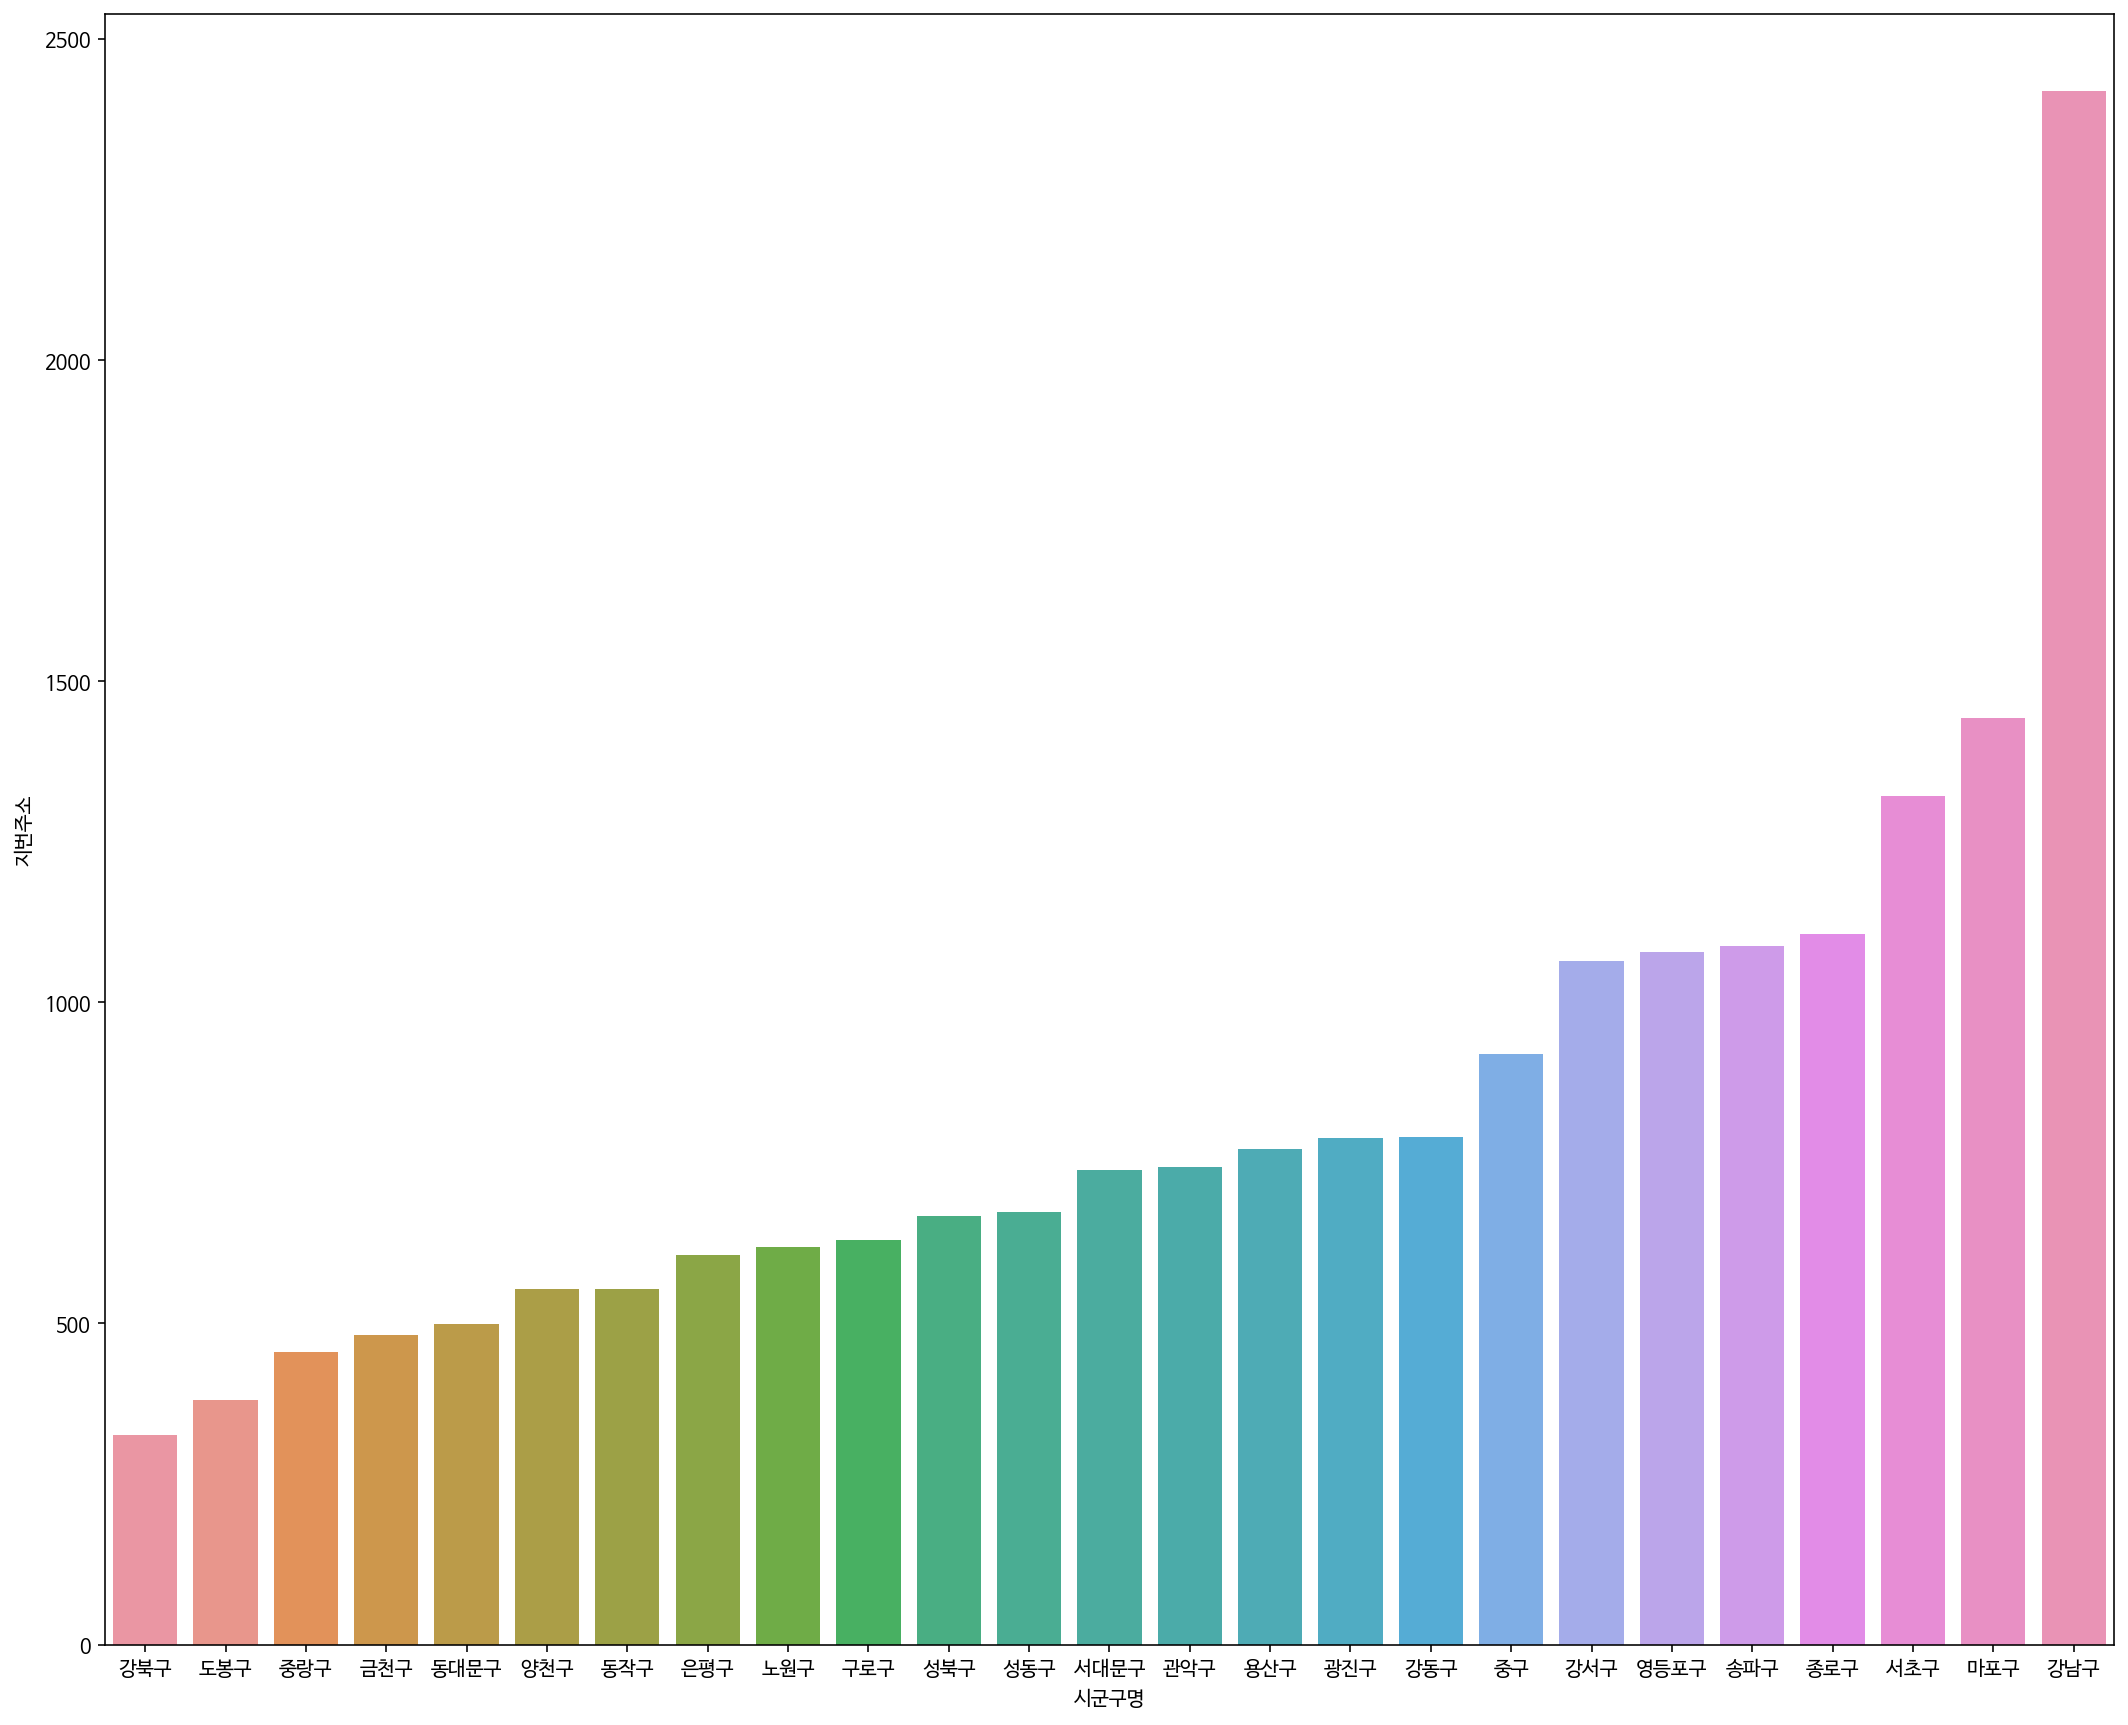

In [20]:
plt.figure(figsize = (18,15))

sns.barplot(data = gu_cafe, x='시군구명',y='지번주소')

아무래도 강남구가 압도적으로 많음. 

In [13]:
import plotly.express as px

fig = px.scatter(cafe, 
                 title="Cafes in Seoul", 
                 x="경도", 
                 y="위도")
fig.show()

많다.......


## DBSCAN
Density-based Spatial Clustering of Applications with Noise  
- 클러스터의 개수가 필요하지 않고 잡음에 대한 강인성이 높음  
- 중요파라미터는 이웃과의 거리를 나타내는 최소 이웃반경인 **입실론**과 최소 이웃수 **Z** 
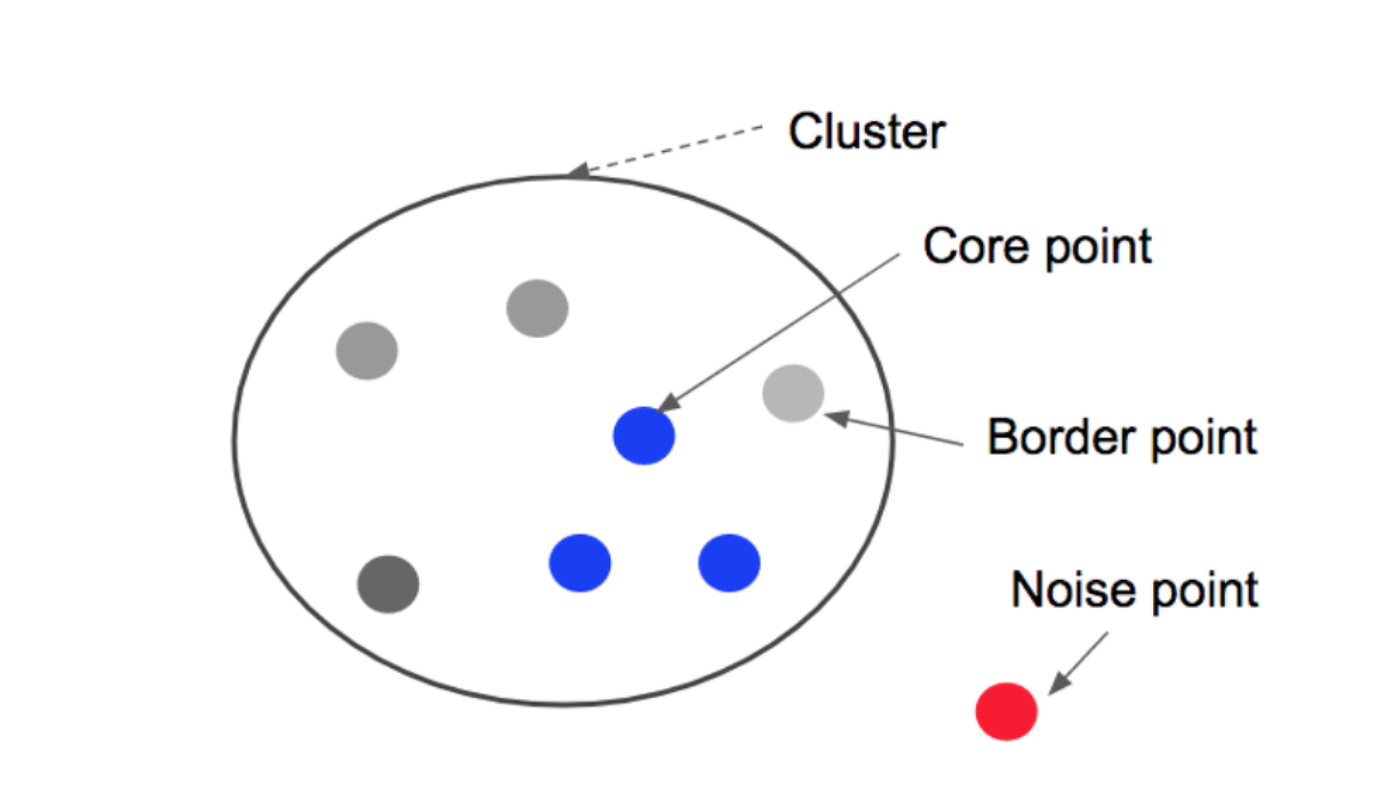  


In [14]:
x_df = cafe[['위도','경도']]

In [15]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.005, min_samples=50, metric='euclidean')
dbscan_labels = dbscan.fit_predict(x_df)

dbscan_labels

array([ 0, 25,  1, ...,  0, -1,  1])

In [16]:
test1 = cafe[['위도','경도']]
test1['test1_label'] = dbscan_labels
test1.head()

,위도,경도,test1_label
0,37.583149,127.000171,0
1,37.658728,127.034746,25
2,37.554599,126.929692,1
3,37.522055,126.842935,-1
4,37.488907,127.122480,2


In [17]:
fig = px.scatter(test1, 
                 title="Test1", 
                 x="경도", 
                 y="위도",
                 color = 'test1_label')
fig.show()

In [18]:
dbscan = DBSCAN(eps=0.005, min_samples=100, metric='euclidean')
dbscan_labels = dbscan.fit_predict(x_df)

test2 = cafe[['위도','경도']]
test2['test2_label'] = dbscan_labels

test2.head()

,위도,경도,test2_label
0,37.583149,127.000171,0
1,37.658728,127.034746,-1
2,37.554599,126.929692,1
3,37.522055,126.842935,-1
4,37.488907,127.122480,16


In [19]:
fig = px.scatter(test2, 
                 title="Test2", 
                 x="경도", 
                 y="위도",
                 color = 'test2_label')
fig.show()

min_sample수 조절 결과 다른 결과가 나온 것을 알 수 있음.  
밑의 결과가 범위 내에 더 많은 카페들이 몰려있다고 볼 수 있다고 이해했기 때문에 둘 중에 고르라면 밑의 클러스터링 결과가 더 유용할 듯  